In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
df=athletes.merge(regions,how='left',on='NOC')

In [7]:
df.shape

(271116, 17)

In [8]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [10]:
df.rename(columns={'region':'Region','notes':'Notes'},inplace=1)
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [11]:
NaN_values=df.isna()
NaN_columns=NaN_values.any()
NaN_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
df.columns[df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [14]:
df.query('Team=="India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
df.query('Name=="Milkha Singh"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
221116,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 200 metres,NaN,India,NaN
221117,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 400 metres,NaN,India,NaN
221118,111108,Milkha Singh,M,24.0,172.0,66.0,India,IND,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 400 metres,NaN,India,NaN
221119,111108,Milkha Singh,M,28.0,172.0,66.0,India,IND,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN


In [17]:
Japan=df.query('Team=="Japan"').describe()
India=df.query('Team=="India"').describe()
print(Japan,India)

                  ID          Age       Height       Weight         Year
count    8289.000000  8173.000000  7408.000000  7348.000000  8289.000000
mean    81911.857522    24.423345   168.173326    63.215977  1983.835203
std     33529.498257     5.164253     9.381821    11.962552    23.903994
min       362.000000    11.000000   140.000000    28.000000  1912.000000
25%     56727.000000    21.000000   162.000000    56.000000  1968.000000
50%     84070.000000    24.000000   168.000000    62.000000  1988.000000
75%    116223.000000    27.000000   175.000000    70.000000  2004.000000
max    134133.000000    71.000000   208.000000   145.000000  2016.000000                   ID          Age      Height      Weight         Year
count    1400.000000  1250.000000  887.000000  865.000000  1400.000000
mean    76701.817143    25.508000  171.577227   67.682659  1978.825714
std     38073.641662     5.171705    9.582507   14.340968    26.931590
min       281.000000    15.000000  137.000000   43.000000  

In [18]:
Top_10_Countries=df.Team.value_counts().sort_values(ascending=False).head(10)
Top_10_Countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

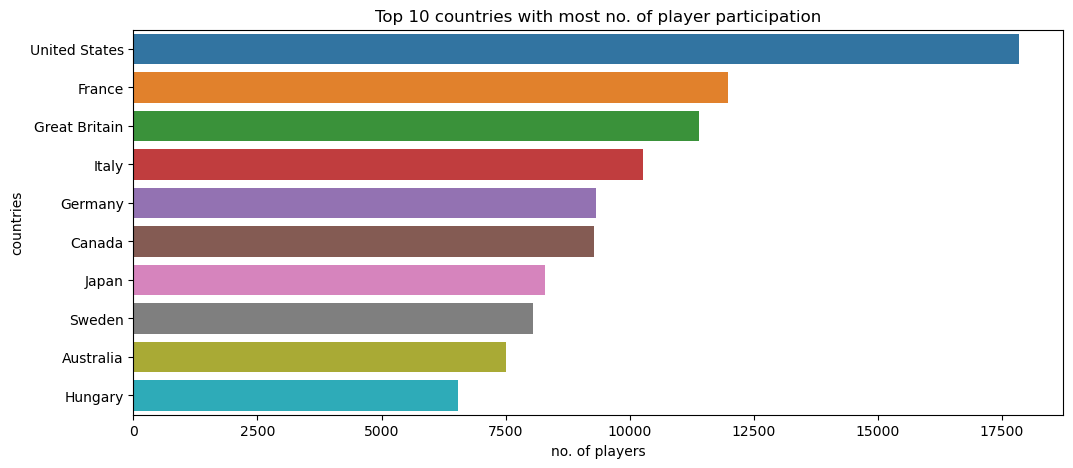

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x=Top_10_Countries,y=Top_10_Countries.index)
plt.title("Top 10 countries with most no. of player participation")
plt.xlabel("no. of players")
plt.ylabel("countries")
plt.show()

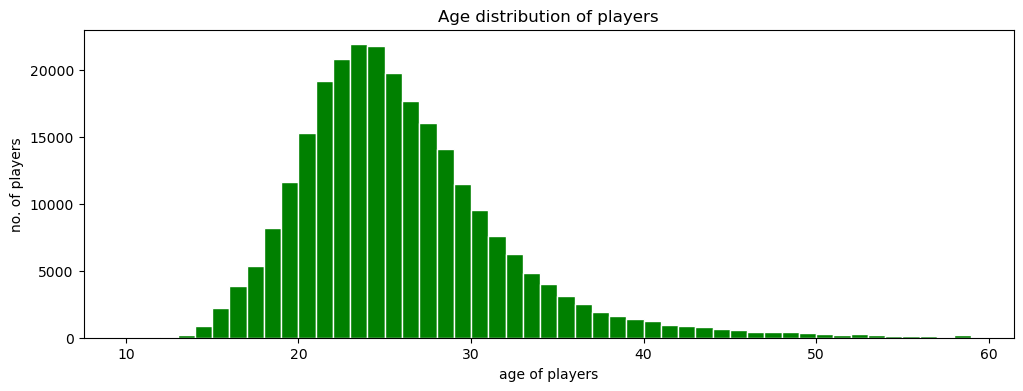

In [20]:
plt.figure(figsize=(12,4))
plt.hist(df.Age,bins=np.arange(10,60),color='Green',edgecolor='white')
plt.title("Age distribution of players")
plt.xlabel("age of players")
plt.ylabel("no. of players")
plt.show()

In [21]:
Winter_games=[df[df.Season=="Winter"].Sport.unique()]
for i in Winter_games:
    print(i)

['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']


In [22]:
Summer_games=[df[df.Season=="Summer"].Sport.unique()]
for i in Summer_games:
    print(i)

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [23]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [25]:
male_count=df['Sex'][df.Sex=='M'].count()
female_count=df['Sex'][df.Sex=='F'].count()
total_count=df.Sex.count()

male_ratio=int((male_count/total_count)*100)
female_ratio=int((female_count/total_count)*100)

print(f"Male to Female participation ratio in olympic history is {male_ratio}:{female_ratio}")


Male to Female participation ratio in olympic history is 72:27


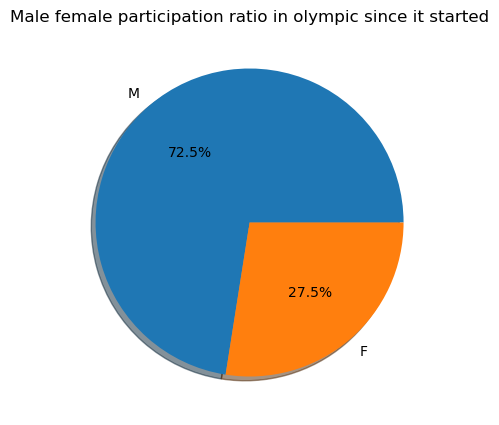

In [27]:
gender_counts=df.Sex.value_counts()
plt.figure(figsize=(10,5))
plt.title("Male female participation ratio in olympic since it started")
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',shadow=True)
plt.show()

In [28]:
male_count=df['Sex'][df.Sex=='M'][df.Year>1950].count()
female_count=df['Sex'][df.Sex=='F'][df.Year>1950].count()
male_ratio=int((male_count/total_count)*100)
female_ratio=int((female_count/total_count)*100)

print(f"Male to Female participation ratio in olympic after year 1950 is {male_ratio}:{female_ratio}")


Male to Female participation ratio in olympic after year 1950 is 56:26


In [34]:
Year=np.arange(1896,2017,4).tolist()

for i in Year:
    male_count=df['Sex'][df.Sex=='M'][df.Year>i].count()
    female_count=df['Sex'][df.Sex=='F'][df.Year>i].count()
    male_ratio=int((male_count/total_count)*100)
    female_ratio=int((female_count/total_count)*100)
    gap=male_ratio-female_ratio
    try:
        venue=df.City[df.Year==i].unique()[0]
    except:
        venue="Unknown"
    print(f"Male-Female ratio in{venue}({i}) is {male_ratio}:{female_ratio} and the gap is {gap}")


Male-Female ratio inAthina(1896) is 72:27 and the gap is 45
Male-Female ratio inParis(1900) is 71:27 and the gap is 44
Male-Female ratio inSt. Louis(1904) is 71:27 and the gap is 44
Male-Female ratio inLondon(1908) is 69:27 and the gap is 42
Male-Female ratio inStockholm(1912) is 67:27 and the gap is 40
Male-Female ratio inUnknown(1916) is 67:27 and the gap is 40
Male-Female ratio inAntwerpen(1920) is 66:27 and the gap is 39
Male-Female ratio inParis(1924) is 64:27 and the gap is 37
Male-Female ratio inAmsterdam(1928) is 62:27 and the gap is 35
Male-Female ratio inLos Angeles(1932) is 61:26 and the gap is 35
Male-Female ratio inBerlin(1936) is 58:26 and the gap is 32
Male-Female ratio inUnknown(1940) is 58:26 and the gap is 32
Male-Female ratio inUnknown(1944) is 58:26 and the gap is 32
Male-Female ratio inLondon(1948) is 56:26 and the gap is 30
Male-Female ratio inHelsinki(1952) is 53:25 and the gap is 28
Male-Female ratio inCortina d'Ampezzo(1956) is 51:25 and the gap is 26
Male-Fema

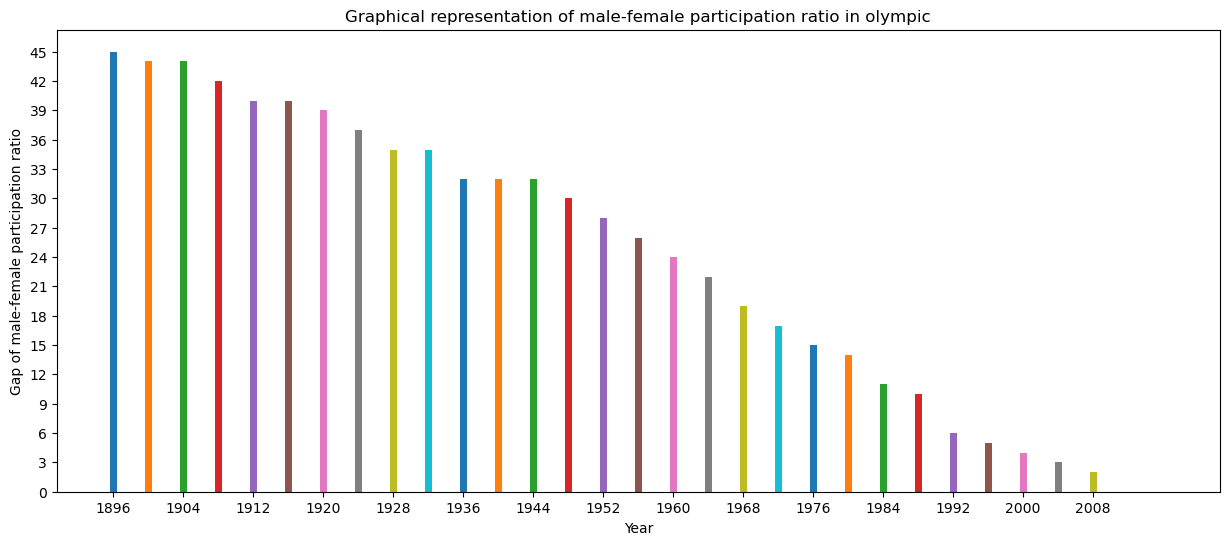

In [35]:
plt.figure(figsize=(15,6))
plt.title("Graphical representation of male-female participation ratio in olympic")
plt.xlabel("Year")
plt.ylabel("Gap of male-female participation ratio")
plt.yticks(np.arange(0,50,3))
plt.xticks(np.arange(1896,2016,8))

for i in Year:
    male_count=df['Sex'][df.Sex=='M'][df.Year>i].count()
    female_count=df['Sex'][df.Sex=='F'][df.Year>i].count()
    male_ratio=int((male_count/total_count)*100)
    female_ratio=int((female_count/total_count)*100)
    gap=male_ratio-female_ratio
    
    plt.bar(i,gap)
plt.show()

In [36]:
female_athlete=df[(df.Sex=="F") & (df.Season=="Summer")][["Year","Sex"]]
female_athlete=female_athlete.groupby("Year").count().reset_index()
female_athlete.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [37]:
women_summer_df=df[(df.Sex=='F') & (df.Season=="Summer")]

Text(0.5, 1.0, 'graphical presentation of women participation in summer olympics')

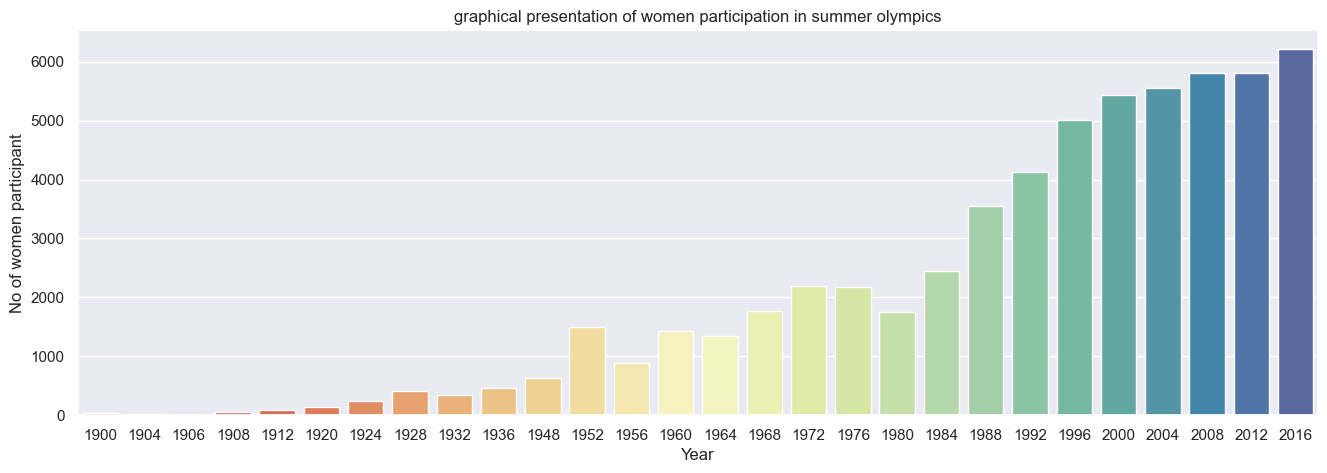

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,5))
sns.countplot(x='Year',data=women_summer_df,palette="Spectral")
plt.ylabel("No of women participant")
plt.title("graphical presentation of women participation in summer olympics")
              

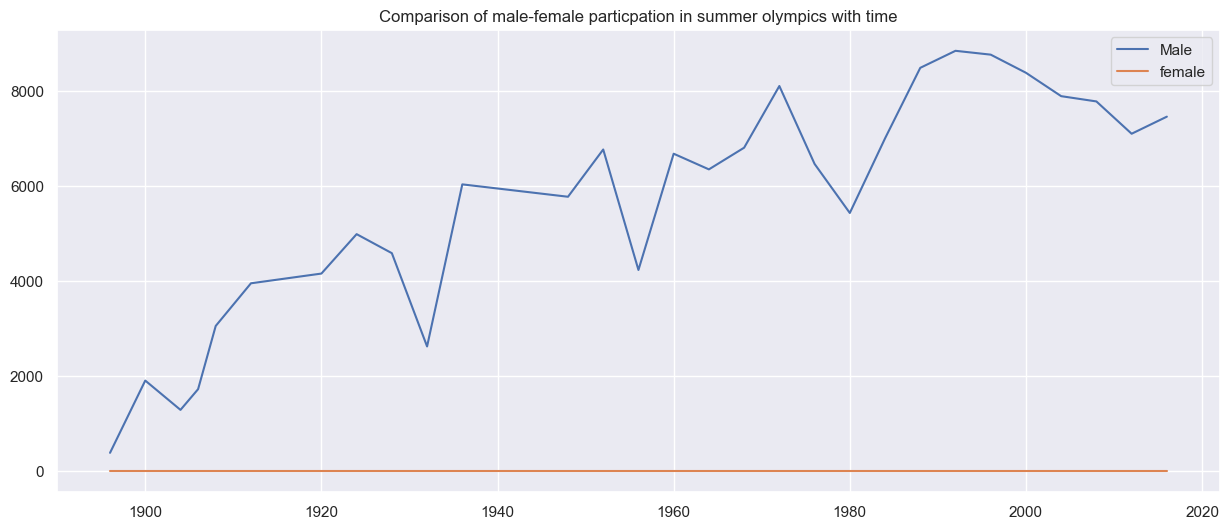

In [44]:
male_participant_yearwise=df[(df.Sex=='M')&(df.Season=='Summer')][['Sex','Year']]
male_participant_yearwise=male_participant_yearwise.groupby('Year').count()

female_participant_yearwise=df[(df.Sex=='F')&(df.Season=='Summer')][['Sex','Year']]
female_participant_yearwise=male_participant_yearwise.groupby('Year').count()

plt.figure(figsize=(15,6))
plt.plot(male_participant_yearwise['Sex'],label="Male")
plt.plot(female_participant_yearwise['Sex'],label="female")
plt.title("Comparison of male-female particpation in summer olympics with time")
plt.legend()
plt.show()
                                                            
                                                            

In [60]:
Top_Countries_with_medals=df[["Team","Medal"]]
Top_Countries_with_medals=Top_Countries_with_medals.groupby("Team").count().sort_values(by="Medal",ascending=False).reset_index()
Top_Countries_with_medals=Top_Countries_with_medals.head(10)
Top_Countries_with_medals

,Team,Medal
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
5,Italy,1527
6,Sweden,1434
7,Australia,1306
8,Canada,1243
9,Hungary,1127


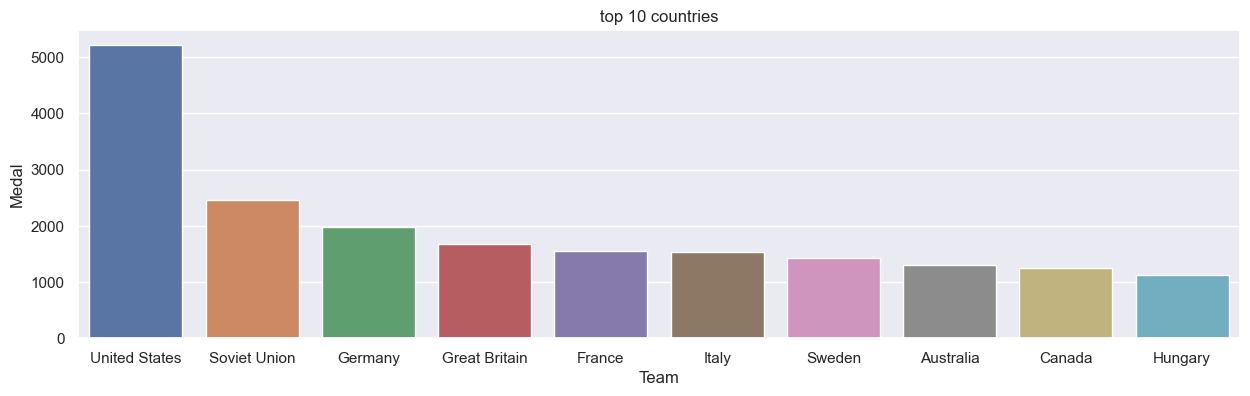

In [61]:
plt.figure(figsize=(15,4))
plt.title("top 10 countries")
sns.barplot(x=Top_Countries_with_medals["Team"],y=Top_Countries_with_medals["Medal"])
plt.show()

In [63]:
Gold_medalist_above_60=df[(df.Age>60)&(df.Medal=="Gold")][["Name","Age","Team","Sport","Medal"]]
Gold_medalist_above_60

,Name,Age,Team,Sport,Medal
104003,Isaac Lazarus Israls,63.0,Netherlands,Art Competitions,Gold
105199,Charles Jacobus,64.0,United States,Roque,Gold
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,Cincinnati Archers,Archery,Gold
226374,"Galen Carter ""G. C."" Spencer",63.0,Potomac Archers,Archery,Gold
233390,Oscar Gomer Swahn,64.0,Sweden,Shooting,Gold
261102,"Robert W. Williams, Jr.",63.0,Potomac Archers,Archery,Gold
